In [275]:
import pandas as pd
from pycaret.regression import *
import numpy as np
import re
from collections import Counter
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn import feature_selection

In [2]:
df  = pd.read_csv('./train_features.csv')
label = pd.read_csv('./train_labels.csv')

In [3]:
len(df)

3276

In [77]:
a =df.describe()

In [89]:
testing_df2 = df.dropna(subset=['age_03'])

In [101]:
for col in testing_df2.columns:
    ratio = testing_df2[col].isna().sum() / len(testing_df2[col])
    if ratio == 0:
        pass
    else:
        if ratio>0.3:            
            print(col)
            print(ratio)
            print()
            testing_df2 = testing_df2.drop([col], axis=1)

decis_famil_03
0.30580357142857145

decis_famil_12
0.4174107142857143

rjob_hrswk_03
0.490625

rjlocc_m_03
0.8620535714285714

rjob_end_03
0.8486607142857143

rjobend_reason_03
0.8446428571428571

sgender_12
0.40133928571428573

rjob_hrswk_12
0.684375

rjlocc_m_12
0.5991071428571428

rjob_end_12
0.8982142857142857

rjobend_reason_12
0.8955357142857143

searnings_12
0.40133928571428573

sinc_pension_12
0.40133928571428573

a16a_12
0.9897321428571428

a21_12
0.9821428571428571

a22_12
0.9848214285714286

a33b_12
0.9821428571428571



In [105]:
testing_df2 = testing_df2.set_index('uid')

In [106]:
str_feature = []
for x in testing_df2.columns:
    if testing_df2[x].dtype=='object':
        str_feature.append(x)

In [107]:
str_feature

['age_03',
 'urban_03',
 'married_03',
 'edu_gru_03',
 'n_living_child_03',
 'glob_hlth_03',
 'bmi_03',
 'employment_03',
 'age_12',
 'urban_12',
 'married_12',
 'edu_gru_12',
 'n_living_child_12',
 'glob_hlth_12',
 'bmi_12',
 'decis_personal_12',
 'employment_12',
 'satis_ideal_12',
 'satis_excel_12',
 'satis_fine_12',
 'cosas_imp_12',
 'wouldnt_change_12',
 'memory_12',
 'ragender',
 'rameduc_m',
 'rafeduc_m',
 'sgender_03',
 'rrelgimp_03',
 'rrelgimp_12',
 'rrfcntx_m_12',
 'rsocact_m_12',
 'rrelgwk_12',
 'a34_12',
 'j11_12']

In [123]:
one_hot_encoded = pd.get_dummies(testing_df2, columns=str_feature)

In [124]:
for x in one_hot_encoded.columns:
    if one_hot_encoded[x].dtype=='bool':
        one_hot_encoded[x] = one_hot_encoded[x].astype('int')
    one_hot_encoded[x] = (one_hot_encoded[x]-one_hot_encoded[x].min())/(one_hot_encoded[x].max()-one_hot_encoded[x].min())

In [121]:
one_hot_encoded['uid']=one_hot_encoded.index

In [125]:
one_hot_encoded.to_csv('train_features_onehot.csv')

In [3]:
features_03 = ['uid','age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03', 'glob_hlth_03', 'adl_dress_03', 
'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 
'iadl_shop_03', 'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03', 'enjoy_03', 
'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03', 'hypertension_03', 'diabetes_03', 'resp_ill_03', 
'arthritis_03', 'hrt_attack_03', 'stroke_03', 'cancer_03', 'n_illnesses_03', 'bmi_03', 'exer_3xwk_03', 'alcohol_03', 
'tobacco_03', 'test_chol_03', 'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03', 
'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03', 'insured_03', 
'decis_famil_03', 'decis_personal_03', 'employment_03', 'sgender_03', 'rjob_hrswk_03', 'rjlocc_m_03', 'rjob_end_03', 
'rjobend_reason_03', 'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03', 
'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03']

In [4]:
features_12 =['uid','age_12', 'urban_12', 'married_12', 'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 
'adl_dress_12', 'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12', 'iadl_money_12', 
'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12', 'hard_12', 'restless_12', 'happy_12', 
'lonely_12', 'enjoy_12', 'sad_12', 'tired_12', 'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 
'diabetes_12', 'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12', 'bmi_12', 
'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12', 'test_diab_12', 'test_pres_12', 'hosp_12', 
'visit_med_12', 'out_proc_12', 'visit_dental_12', 'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 
'insur_other_12', 'seg_pop_12', 'insured_12', 'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 
'vax_pneu_12', 'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12', 'reads_12', 
'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12', 'sewing_12', 'satis_ideal_12', 'satis_excel_12', 
'satis_fine_12', 'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'sgender_12', 'rjob_hrswk_12', 'rjlocc_m_12', 
'rjob_end_12', 'rjobend_reason_12', 'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 
'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 
'rrelgwk_12', 'a16a_12', 'a21_12', 'a22_12', 'a33b_12', 'a34_12', 'j11_12']


In [5]:
str_features = ["age_03", "age_12", "urban_03", "urban_12", "married_03", "married_12", "edu_gru_03", "edu_gru_12",
    "n_living_child_03", "n_living_child_12", "glob_hlth_03", "glob_hlth_12", "bmi_03", "bmi_12", "decis_famil_03",
    "decis_famil_12", "decis_personal_03", "decis_personal_12", "employment_03", "employment_12", "satis_ideal_12",
    "satis_excel_12", "satis_fine_12", "cosas_imp_12", "wouldnt_change_12", "memory_12", "ragender", "rameduc_m",
    "rafeduc_m", "sgender_03", "sgender_12", 
                # "rjlocc_m_03", "rjlocc_m_12", "rjobend_reason_03", "rjobend_reason_12",                
    "rrelgimp_03", "rrelgimp_12", "rrfcntx_m_12", "rsocact_m_12", "rrelgwk_12", "a22_12", "a33b_12", "a34_12", "j11_12"]

In [6]:
label_2016 = label[label['year']==2016].set_index('uid')
label_2021 = label[label['year']==2021].set_index('uid')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'composite_score'}>]], dtype=object)

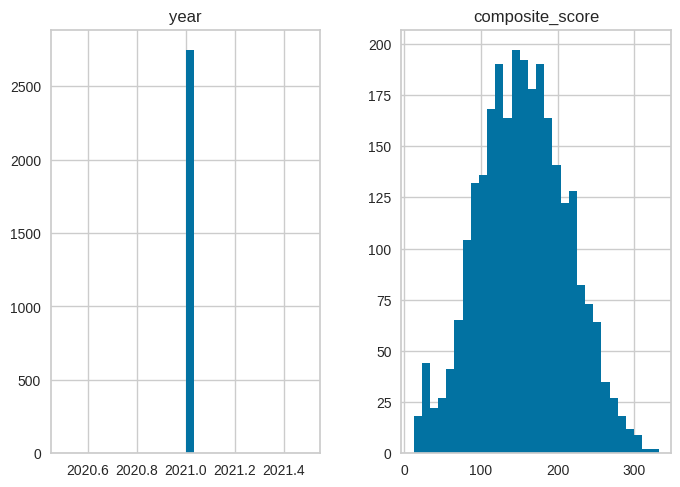

In [7]:
label_2021.hist(bins=30)

In [127]:
bins = range(0,385,5)
labels = range(5,385,5)
fold=10

In [128]:
len(labels)

76

In [190]:
ssss = pd.read_csv('/STORAGE/peter/PREPARE/dlmodel/train_20.csv')

In [ ]:
k=sorted(key.keys())
c=key[k[0]]
value = key[k[0]]*k[0]
span=[k[0]]
v=[]
for i in k[1:]:
    c+=key[i]
    if c+key[i]<15:
        value+=key[i]*i
        pass
    else:
        span.append(i)
        value+=key[i]*i
        v.append(int(value/c))
        value =0
        c=0

In [97]:
lable2016 = label[label['year']==2016]
lable2021 = label[label['year']==2016]

In [5]:
len(lable2016)

1596

In [6]:
len(lable2021)

2747

In [55]:
key2016=Counter(lable2016['composite_score'].values)
key2021=Counter(lable2021['composite_score'].values)

In [41]:
c= Counter(key2021)

In [ ]:
c

In [45]:
bins = list(range(0, 385, 5))

In [96]:
len(bins)

77

In [51]:
last = 0 
curr  = 1
lable2021[(lable2021['composite_score']<=bins[curr])&(lable2021['composite_score']>bins[last])]

,uid,year,composite_score


In [53]:
bins[curr]

5

In [276]:
labels = []
for i in range(1, len(bins)):
    last = i-1 
    curr  = i
    m = lable2021[(lable2021['composite_score']<=bins[curr])&(lable2021['composite_score']>bins[last])]['composite_score'].values.tolist()
    if len(m)>0:
        labels.append( lable2021[(lable2021['composite_score']<=bins[curr])&(lable2021['composite_score']>bins[last])]['composite_score'].values.mean())
    else:

        labels.append('nan')
        # labels.append((bins[last]+bins[curr])/2)
        

In [277]:
len(labels)

76

In [278]:
labels

['nan',
 'nan',
 13.333333333333334,
 18.714285714285715,
 23.38888888888889,
 27.6,
 32.75,
 38.416666666666664,
 42.2,
 48.07692307692308,
 53.0,
 58.04761904761905,
 63.1764705882353,
 68.03846153846153,
 72.46153846153847,
 77.95238095238095,
 82.94,
 88.04411764705883,
 92.58,
 97.91525423728814,
 103.22368421052632,
 108.22222222222223,
 113.3013698630137,
 118.12,
 122.84782608695652,
 128.025,
 133.1038961038961,
 137.6705882352941,
 143.21505376344086,
 148.07777777777778,
 153.03333333333333,
 158.02247191011236,
 163.09574468085106,
 168.26315789473685,
 172.78125,
 178.1012658227848,
 182.95294117647057,
 187.71830985915494,
 193.32558139534885,
 198.12698412698413,
 202.95,
 208.20833333333334,
 213.13636363636363,
 218.04545454545453,
 223.06521739130434,
 228.12121212121212,
 233.0612244897959,
 237.925,
 242.85185185185185,
 248.0,
 252.9090909090909,
 258.11764705882354,
 262.85714285714283,
 267.6666666666667,
 272.5833333333333,
 278.125,
 283.2,
 287.6,
 293.5,
 298

In [88]:
for 

[[],
 [],
 [14, 14, 15, 12, 13, 12],
 [19, 20, 17, 20, 20, 18, 17],
 [25, 25, 23, 24, 21, 22, 24, 24, 25, 21, 23, 22, 25, 22, 24, 23, 25, 23],
 [26,
  30,
  27,
  29,
  27,
  26,
  26,
  29,
  30,
  27,
  27,
  27,
  27,
  28,
  27,
  28,
  28,
  26,
  29,
  28],
 [33, 33, 32, 33, 35, 33, 31, 33, 33, 33, 32, 32],
 [40, 39, 40, 40, 37, 36, 38, 40, 37, 38, 36, 40],
 [43, 41, 41, 41, 41, 43, 45, 43, 41, 43],
 [48, 50, 46, 50, 46, 46, 49, 48, 46, 50, 50, 49, 47],
 [52, 54, 51, 51, 55, 52, 52, 53, 55, 54, 54, 52, 55, 53, 54, 51],
 [60,
  57,
  59,
  57,
  57,
  58,
  57,
  59,
  59,
  59,
  58,
  60,
  59,
  57,
  57,
  59,
  59,
  56,
  57,
  56,
  59],
 [64, 63, 64, 65, 62, 62, 64, 62, 65, 63, 61, 62, 63, 61, 65, 65, 63],
 [69,
  66,
  66,
  69,
  67,
  70,
  66,
  68,
  70,
  70,
  66,
  70,
  68,
  66,
  66,
  70,
  66,
  67,
  68,
  69,
  70,
  70,
  67,
  67,
  68,
  70],
 [71,
  74,
  75,
  72,
  73,
  73,
  71,
  72,
  74,
  72,
  74,
  73,
  71,
  71,
  73,
  73,
  75,
  73,
  73,


In [66]:
labels[0]

nan

In [37]:
ll=list(c.keys())

In [38]:
ll[0]=0

In [39]:
a  =pd.cut(ll, bins=bins, labels=labels)

In [40]:
a[0]

4

In [11]:
sorted(c)

[4,
 8,
 10,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 32,
 33,
 34,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,


In [8]:
key = key2016

In [9]:
key

Counter({161: 10,
         13: 4,
         38: 3,
         272: 5,
         87: 5,
         203: 13,
         17: 3,
         126: 2,
         178: 8,
         225: 9,
         231: 10,
         71: 2,
         151: 11,
         163: 16,
         179: 11,
         144: 13,
         56: 4,
         246: 8,
         202: 8,
         281: 2,
         159: 12,
         248: 3,
         191: 15,
         267: 5,
         223: 6,
         183: 10,
         60: 4,
         48: 3,
         108: 7,
         229: 8,
         234: 5,
         122: 8,
         47: 4,
         68: 4,
         215: 4,
         158: 9,
         134: 11,
         100: 6,
         104: 9,
         221: 5,
         42: 1,
         247: 7,
         198: 7,
         121: 6,
         20: 3,
         4: 1,
         119: 11,
         195: 11,
         269: 2,
         164: 8,
         125: 5,
         194: 9,
         277: 3,
         184: 10,
         212: 7,
         53: 4,
         21: 5,
         103: 10,
         80: 6,

In [7]:
k=sorted(key.keys())
c=key[k[0]]
value = key[k[0]]*k[0]
span=[k[0]]
v=[]
for i in k[1:]:
    c+=key[i]
    if c+key[i]<30:
        value+=key[i]*i
        if i==k[-1]:
            span.append(i)
            v.append(int(value/c))
    else:
        span.append(i)
        value+=key[i]*i
        v.append(int(value/c))
        value =0
        c=0

In [8]:
len(span), len(v)

(62, 61)

In [9]:
span

[4,
 21,
 29,
 45,
 56,
 66,
 74,
 80,
 87,
 91,
 94,
 98,
 103,
 107,
 111,
 115,
 119,
 123,
 128,
 131,
 134,
 138,
 140,
 143,
 146,
 148,
 151,
 155,
 158,
 161,
 163,
 165,
 168,
 172,
 175,
 177,
 179,
 181,
 183,
 186,
 189,
 191,
 195,
 198,
 200,
 203,
 207,
 211,
 213,
 217,
 222,
 225,
 229,
 234,
 238,
 246,
 251,
 256,
 264,
 272,
 287,
 334]

In [10]:
v

[16,
 24,
 37,
 51,
 62,
 70,
 77,
 84,
 89,
 93,
 96,
 101,
 105,
 109,
 113,
 117,
 121,
 126,
 129,
 133,
 136,
 139,
 142,
 144,
 147,
 149,
 153,
 157,
 159,
 162,
 164,
 166,
 170,
 174,
 176,
 178,
 180,
 182,
 185,
 188,
 190,
 193,
 196,
 199,
 202,
 205,
 209,
 212,
 215,
 219,
 224,
 227,
 231,
 236,
 243,
 248,
 253,
 260,
 268,
 280,
 305]

In [260]:
bins_2016 = [4,
             17,
             21,
             22,
             24,
             32,
             38,
             45,
             52,
             56,
             62,
             66,
             70,
             74,
             77,
             80,
             84,
             87,
             90,
             92,
             93,
             94,
             96,
             97,
             99,
             101,
             103,
             104,
             105,
             107,
             109,
             111,
             113,
             115,
             116,
             118,
             119,
             121,
             122,
             124,
             127,
             128,
             129,
             131,
             133,
             134,
             135,
             137,
             138,
             139,
             140,
             142,
             143,
             144,
             145,
             146,
             147,
             148,
             149,
             150,
             151,
             153,
             155,
             156,
             158,
             159,
             160,
             161,
             163,
             164,
             165,
             166,
             168,
             170,
             172,
             174,
             175,
             176,
             177,
             178,
             179,
             181,
             182,
             183,
             184,
             186,
             187,
             189,
             190,
             191,
             194,
             195,
             196,
             198,
             199,
             200,
             201,
             202,
             203,
             204,
             206,
             208,
             210,
             212,
             213,
             216,
             217,
             219,
             221,
             223,
             225,
             227,
             229,
             231,
             234,
             235,
             237,
             241,
             244,
             246,
             249,
             251,
             253,
             256,
             260,
             264,
             267,
             272,
             278,
             285,
             296,
             334]

labels_2016 = [13,
               19,
               22,
               23,
               29,
               35,
               42,
               48,
               54,
               60,
               64,
               68,
               72,
               76,
               79,
               83,
               86,
               89,
               91,
               93,
               94,
               95,
               97,
               98,
               100,
               102,
               104,
               105,
               106,
               108,
               110,
               112,
               114,
               116,
               117,
               119,
               120,
               122,
               123,
               126,
               128,
               129,
               130,
               132,
               134,
               135,
               136,
               138,
               139,
               140,
               141,
               143,
               144,
               145,
               146,
               147,
               148,
               149,
               150,
               151,
               152,
               154,
               156,
               157,
               159,
               160,
               161,
               162,
               164,
               165,
               166,
               167,
               169,
               171,
               173,
               175,
               176,
               177,
               178,
               179,
               180,
               182,
               183,
               184,
               185,
               187,
               188,
               190,
               191,
               193,
               195,
               196,
               197,
               199,
               200,
               201,
               202,
               203,
               204,
               205,
               207,
               209,
               211,
               213,
               215,
               217,
               218,
               220,
               222,
               224,
               226,
               228,
               230,
               232,
               235,
               236,
               239,
               243,
               245,
               248,
               250,
               252,
               255,
               258,
               263,
               266,
               270,
               275,
               282,
               290,
               315]
bins_2021 = [12,
             20,
             24,
             27,
             32,
             38,
             41,
             49,
             52,
             57,
             59,
             63,
             66,
             70,
             71,
             72,
             73,
             76,
             78,
             79,
             81,
             82,
             83,
             84,
             85,
             86,
             87,
             88,
             89,
             90,
             91,
             92,
             93,
             95,
             96,
             97,
             98,
             99,
             100,
             101,
             102,
             103,
             104,
             105,
             106,
             107,
             108,
             109,
             110,
             111,
             112,
             113,
             114,
             115,
             116,
             117,
             118,
             119,
             120,
             121,
             122,
             123,
             124,
             125,
             126,
             127,
             128,
             129,
             130,
             131,
             132,
             133,
             134,
             135,
             136,
             137,
             138,
             139,
             140,
             141,
             142,
             143,
             144,
             145,
             146,
             147,
             148,
             149,
             150,
             151,
             152,
             153,
             154,
             155,
             156,
             157,
             158,
             159,
             160,
             161,
             162,
             163,
             164,
             165,
             166,
             167,
             169,
             170,
             171,
             172,
             173,
             174,
             175,
             176,
             178,
             179,
             180,
             181,
             182,
             183,
             184,
             185,
             186,
             187,
             188,
             189,
             190,
             191,
             192,
             193,
             194,
             195,
             196,
             197,
             198,
             199,
             200,
             201,
             202,
             203,
             204,
             205,
             207,
             208,
             210,
             211,
             212,
             213,
             214,
             215,
             216,
             217,
             218,
             219,
             220,
             221,
             222,
             224,
             225,
             226,
             229,
             230,
             231,
             232,
             233,
             234,
             235,
             237,
             239,
             241,
             243,
             244,
             247,
             250,
             251,
             253,
             255,
             258,
             263,
             267,
             271,
             278,
             287,
             295,
             309,
             332]
labels_2021 = [16,
               22,
               26,
               29,
               34,
               40,
               45,
               51,
               55,
               58,
               61,
               65,
               68,
               71,
               72,
               73,
               75,
               77,
               79,
               80,
               82,
               83,
               84,
               85,
               86,
               87,
               88,
               89,
               90,
               91,
               92,
               93,
               94,
               96,
               97,
               98,
               99,
               100,
               101,
               102,
               103,
               104,
               105,
               106,
               107,
               108,
               109,
               110,
               111,
               112,
               113,
               114,
               115,
               116,
               117,
               118,
               119,
               120,
               121,
               122,
               123,
               124,
               125,
               126,
               127,
               128,
               129,
               130,
               131,
               132,
               133,
               134,
               135,
               136,
               137,
               138,
               139,
               140,
               141,
               142,
               143,
               144,
               145,
               146,
               147,
               148,
               149,
               150,
               151,
               152,
               153,
               154,
               155,
               156,
               157,
               158,
               159,
               160,
               161,
               162,
               163,
               164,
               165,
               166,
               167,
               168,
               170,
               171,
               172,
               173,
               174,
               175,
               176,
               177,
               179,
               180,
               181,
               182,
               183,
               184,
               185,
               186,
               187,
               188,
               189,
               190,
               191,
               192,
               193,
               194,
               195,
               196,
               197,
               198,
               199,
               200,
               201,
               202,
               203,
               204,
               205,
               206,
               208,
               209,
               211,
               212,
               213,
               214,
               215,
               216,
               217,
               218,
               219,
               220,
               221,
               222,
               223,
               225,
               226,
               228,
               230,
               231,
               232,
               233,
               234,
               235,
               236,
               238,
               240,
               242,
               244,
               246,
               249,
               251,
               252,
               254,
               257,
               260,
               265,
               269,
               274,
               283,
               291,
               303,
               321]

In [269]:
folds = np.array_split(np.arange(1000), 5)

In [272]:
folds[4]

array([800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812,
       813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
       826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838,
       839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851,
       852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864,
       865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877,
       878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890,
       891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903,
       904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916,
       917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929,
       930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942,
       943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955,
       956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968,
       969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 98

In [274]:
np.setdiff1d( np.arange(1000), folds[4])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [270]:

valid_df = train_shuffle.iloc[folds[5]]
train_df = train_shuffle.iloc[np.setdiff1d(
            np.arange(1000), valid_df)]

NameError: name 'train_shuffle' is not defined

In [261]:
kkkk= pd.read_csv("/STORAGE/peter/PREPARE/dlmodel/train_2016_0.csv")

In [266]:
kkkk['composite_score']

0       316
1       159
2       155
3       147
4       223
       ... 
1398     75
1399     78
1400    204
1401    102
1402    276
Name: composite_score, Length: 1403, dtype: int64

In [267]:
pd.cut(kkkk['composite_score'], bins=bins, labels=labels).astype(int).values

array([320, 160, 155, ..., 205, 105, 280])

In [129]:
# Create subgroups
label_2021['composite_score_group'] = pd.cut(label_2021['composite_score'], bins=bins, labels=labels).astype(int)

<Axes: >

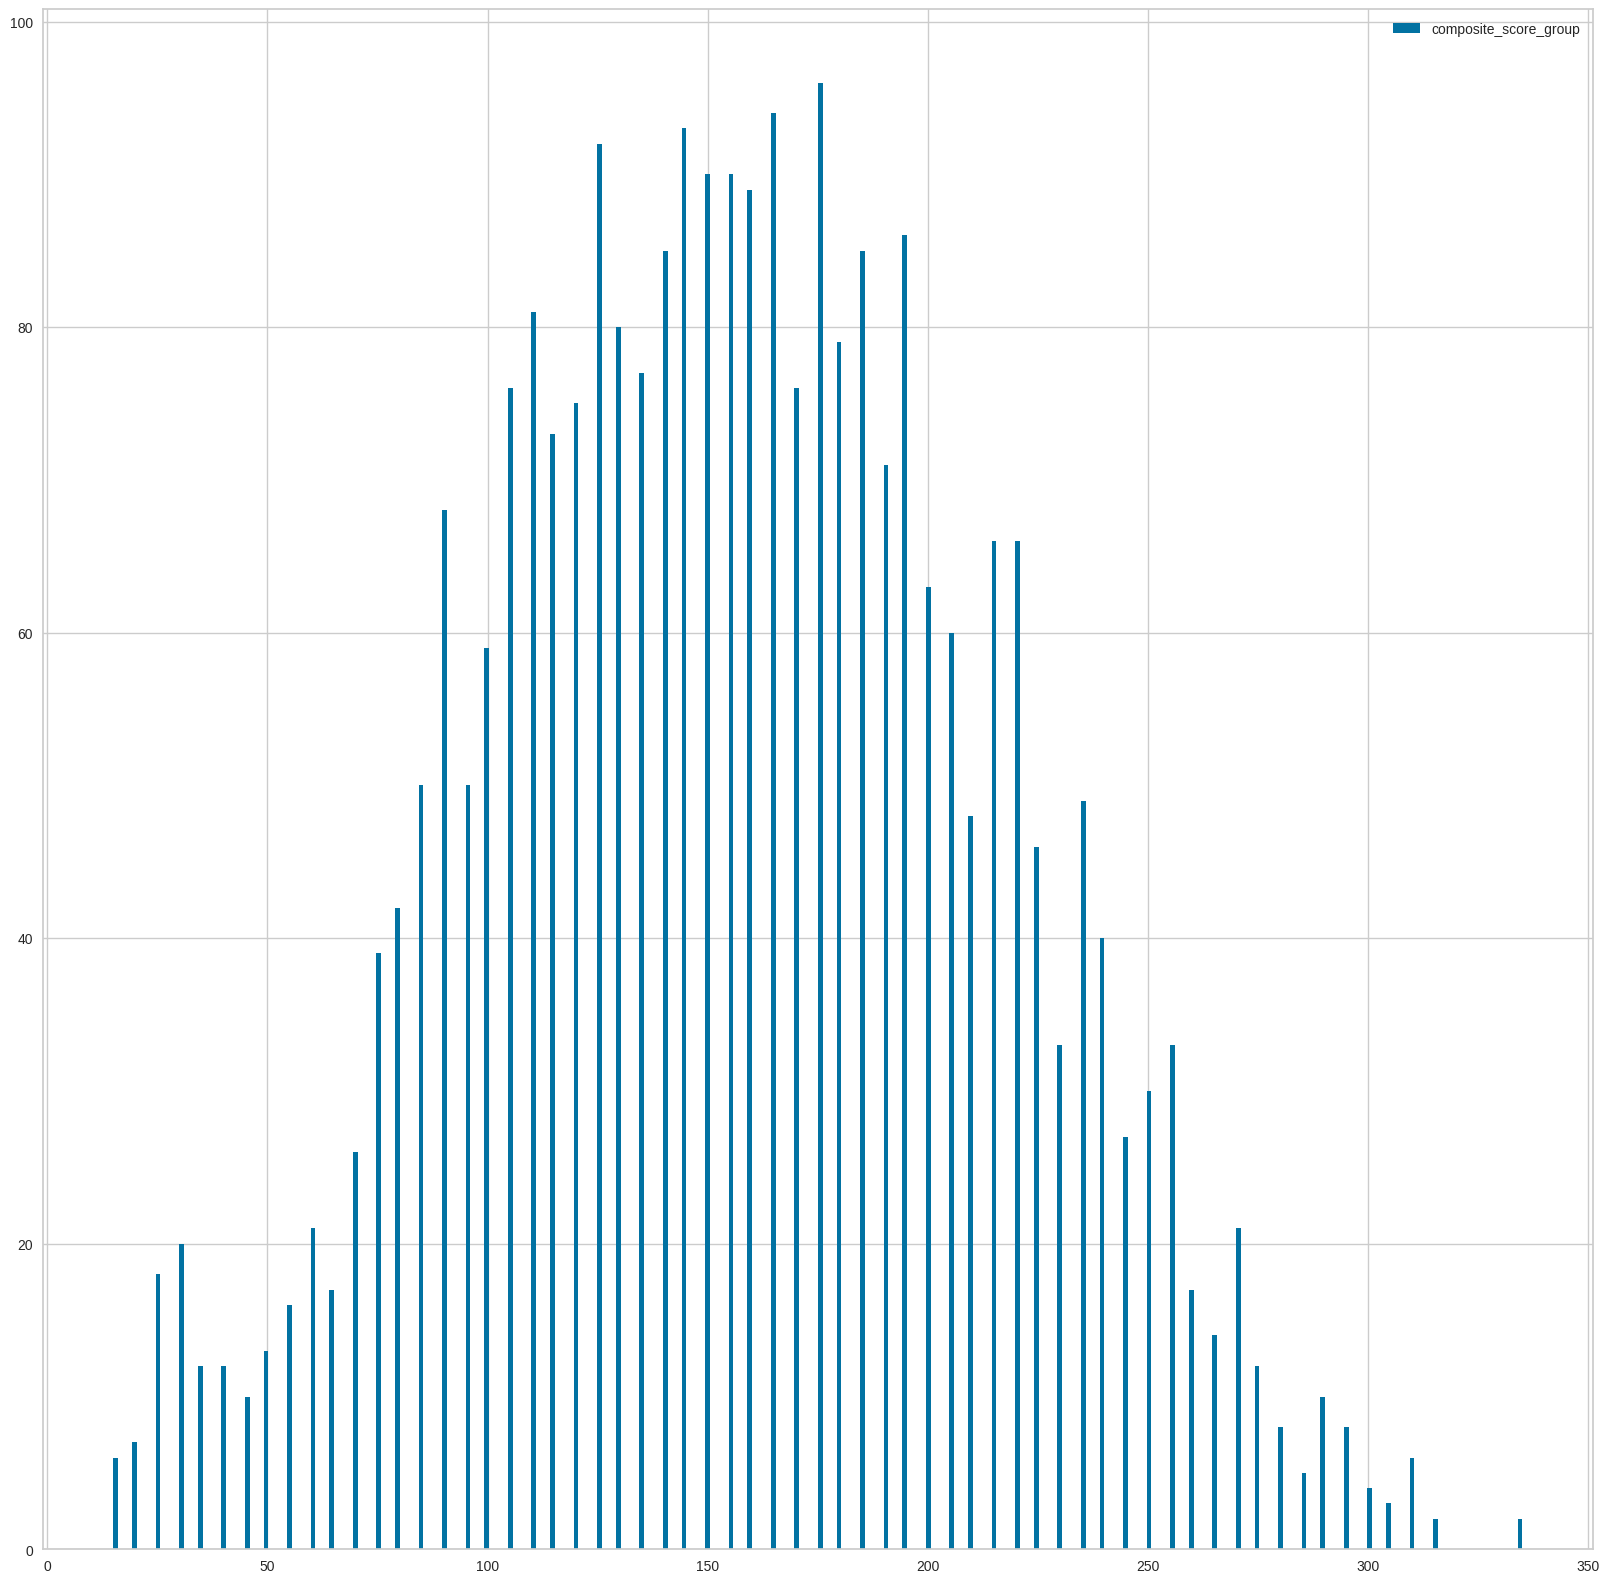

In [130]:
label_2021['composite_score_group'].hist(bins=300,legend=True,figsize=(20,20))

In [12]:
# Create subgroups
label_2016['composite_score_group'] = pd.cut(label_2016['composite_score'], bins=bins, labels=labels).astype(int)

<Axes: >

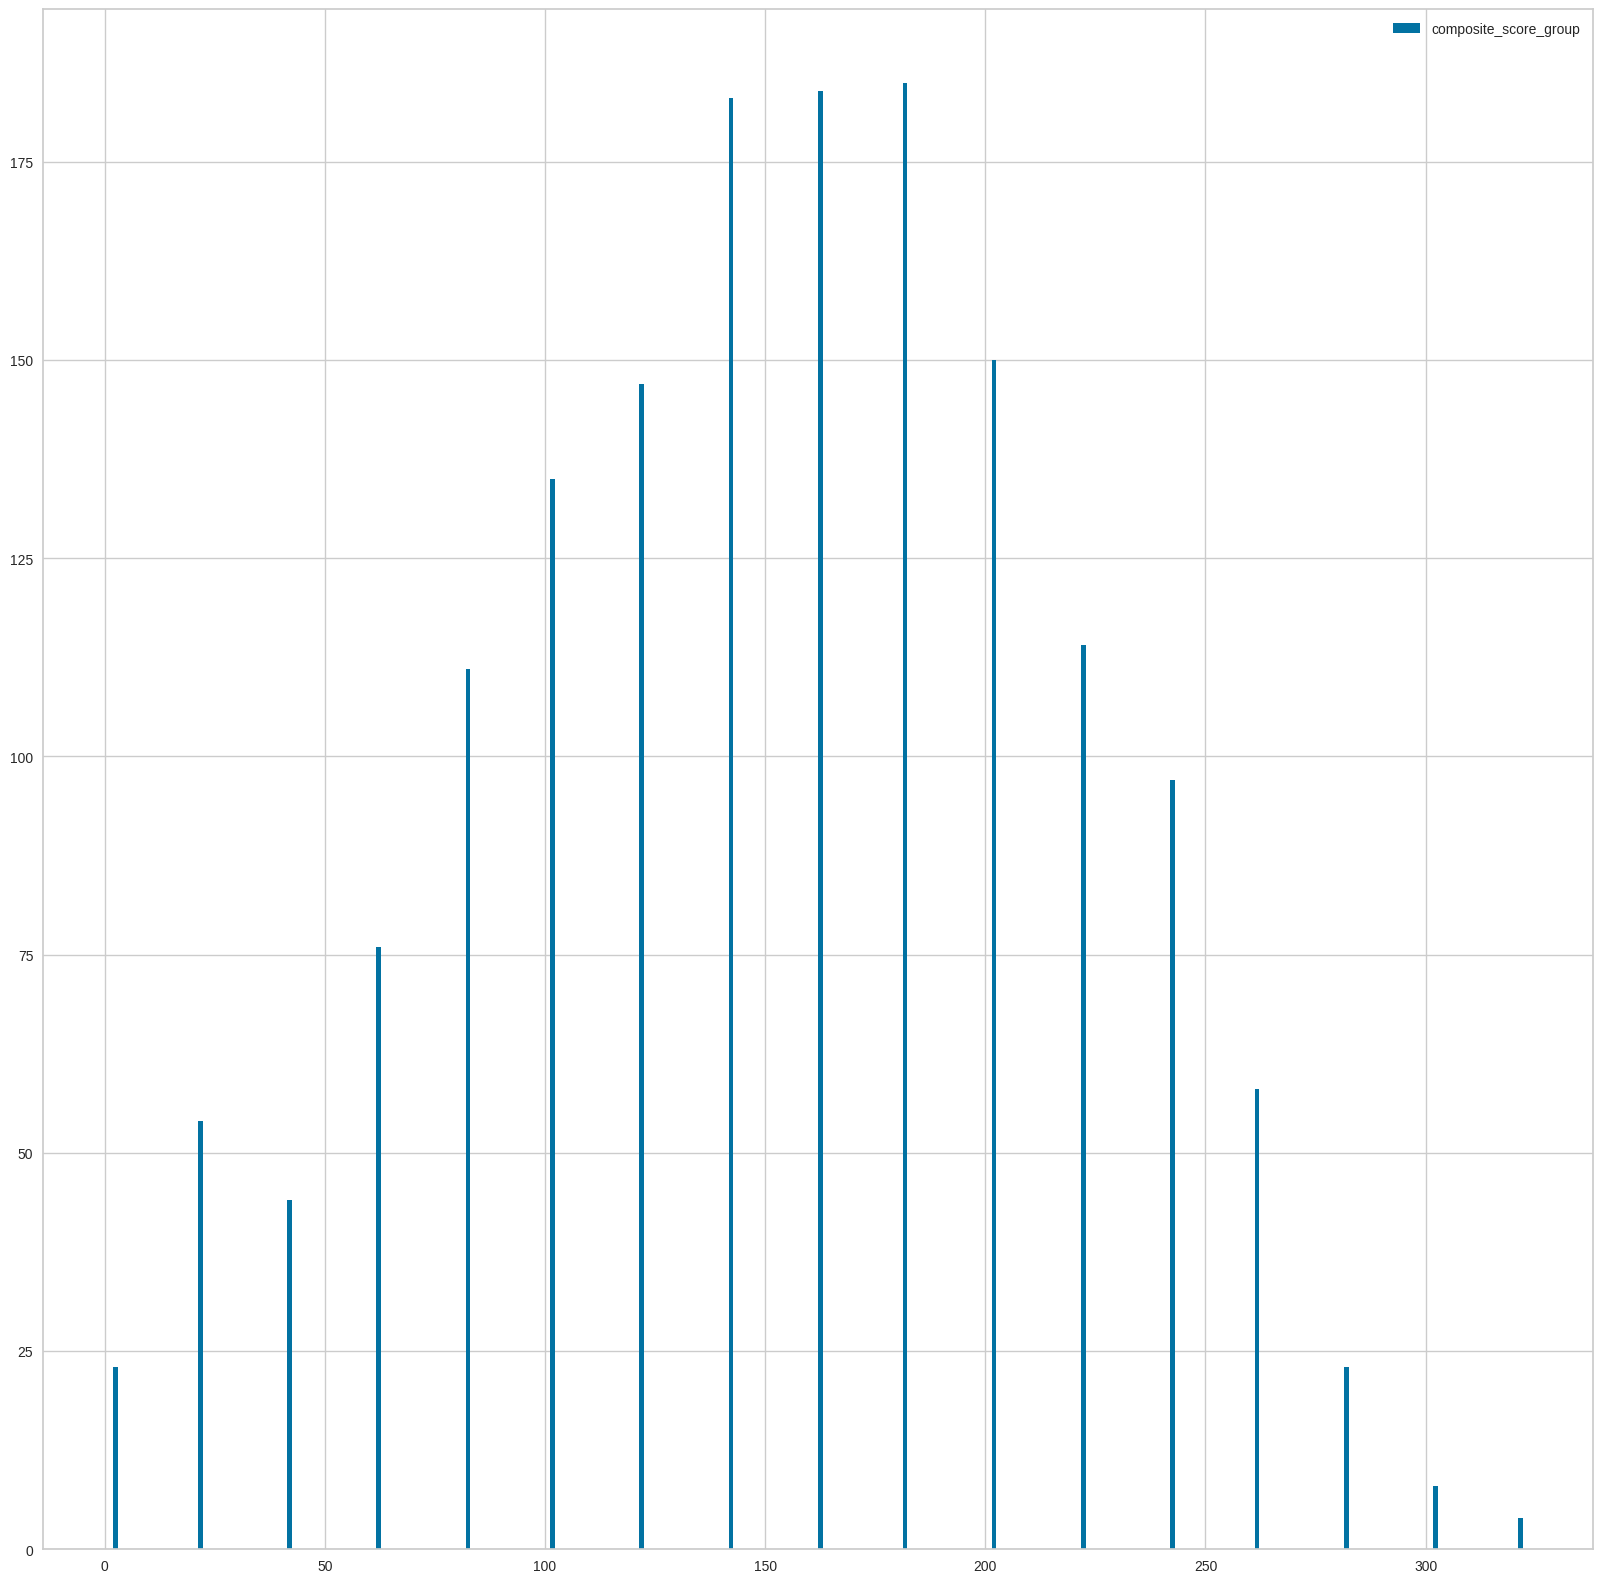

In [13]:
label_2016['composite_score_group'].hist(bins=300,legend=True,figsize=(20,20))

In [14]:
df_03 = df[features_03]
df_12 = df[features_12]

In [15]:
df_dropna_03= df_03.drop(['rjlocc_m_03','rjob_end_03','rjobend_reason_03'],axis=1).dropna(subset=['age_03']).set_index('uid')
df_dropna_12= df_12.drop(['rjlocc_m_12','rjob_end_12','rjobend_reason_12'],axis=1).dropna(subset=['age_12']).set_index('uid')

In [16]:
for col in df_dropna_03.columns:
    print(col)

age_03
urban_03
married_03
n_mar_03
edu_gru_03
n_living_child_03
migration_03
glob_hlth_03
adl_dress_03
adl_walk_03
adl_bath_03
adl_eat_03
adl_bed_03
adl_toilet_03
n_adl_03
iadl_money_03
iadl_meds_03
iadl_shop_03
iadl_meals_03
n_iadl_03
depressed_03
hard_03
restless_03
happy_03
lonely_03
enjoy_03
sad_03
tired_03
energetic_03
n_depr_03
cesd_depressed_03
hypertension_03
diabetes_03
resp_ill_03
arthritis_03
hrt_attack_03
stroke_03
cancer_03
n_illnesses_03
bmi_03
exer_3xwk_03
alcohol_03
tobacco_03
test_chol_03
test_tuber_03
test_diab_03
test_pres_03
hosp_03
visit_med_03
out_proc_03
visit_dental_03
imss_03
issste_03
pem_def_mar_03
insur_private_03
insur_other_03
insured_03
decis_famil_03
decis_personal_03
employment_03
sgender_03
rjob_hrswk_03
rearnings_03
searnings_03
hincome_03
hinc_business_03
hinc_rent_03
hinc_assets_03
hinc_cap_03
rinc_pension_03
sinc_pension_03
rrelgimp_03


In [17]:
data_dropna_12_21 = df_dropna_12.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)

<Axes: >

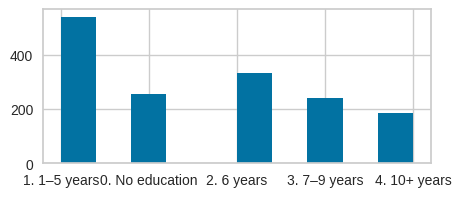

In [18]:
data_dropna_12_21.edu_gru_12.hist(figsize=(5,2))

In [19]:
data_dropna_12_21.columns

Index(['age_12', 'urban_12', 'married_12', 'n_mar_12', 'edu_gru_12',
       'n_living_child_12', 'migration_12', 'glob_hlth_12', 'adl_dress_12',
       'adl_walk_12',
       ...
       'rsocact_m_12', 'rrelgwk_12', 'a16a_12', 'a21_12', 'a22_12', 'a33b_12',
       'a34_12', 'j11_12', 'composite_score', 'composite_score_group'],
      dtype='object', length=104)

### Predict 2021 result with 2012 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [20]:
df_dropna_12_21_data=df_dropna_12.merge(label_2021, left_index=True,right_index=True)
data_dropna_12_21 = df_dropna_12_21_data.drop(['year','composite_score'], axis=1)
for fea in str_features:
    if fea in data_dropna_12_21.columns:
        print(fea)
        print(sorted(list(Counter(data_dropna_12_21[fea].dropna()).keys())))

age_12
['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+']
urban_12
['0. <100,000', '1. 100,000+']
married_12
['1. Married or in civil union', '2. Separated or divorced', '3. Widowed', '4. Single']
edu_gru_12
['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years']
n_living_child_12
['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+']
glob_hlth_12
['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor']
bmi_12
['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese']
decis_famil_12
['1. Respondent', '2. Approximately equal weight', '3. Spouse']
decis_personal_12
['1. A lot', '2. A little', '3. None']
employment_12
['1. Currently Working', '2. Currently looking for work', '3. Dedicated to household chores', '4. Retired, incapacitated, or does not work']
satis_ideal_12
['1. Agrees', '2. Neither agrees nor disagrees', '3. Disagrees']
satis_excel_12
['1. Agrees', '2. Neither agrees nor disagrees',

In [21]:
# data_dropna_12_21 = df_dropna_12.merge(label_2021, left_index=True,right_index=True).drop(['year'], axis=1)
s=setup(data_dropna_12_21, target = 'composite_score_group',fold=fold, index=True,session_id =1, ordinal_features = 
        {'age_12' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_12':['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_12':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_12':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'memory_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'rrelgimp_12':['1.very important', '2.somewhat important', '3.not important'],
         'rrfcntx_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
         'rsocact_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
                  })
bests = compare_models(n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score_group
2,Target type,Regression
3,Original data shape,"(2668, 103)"
4,Transformed data shape,"(2668, 169)"
5,Transformed train set shape,"(1867, 169)"
6,Transformed test set shape,"(801, 169)"
7,Ordinal features,9
8,Numeric features,77
9,Categorical features,25


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,32.2282,1670.3941,40.8236,0.4970,0.4150,0.4649,0.1670
gbr,Gradient Boosting Regressor,32.3799,1697.5927,41.1504,0.4886,0.4188,0.4797,0.1000
ridge,Ridge Regression,32.5207,1715.1368,41.3721,0.4825,0.4164,0.4480,0.1650
rf,Random Forest Regressor,32.6119,1721.6316,41.4380,0.4815,0.4221,0.4967,0.1120
llar,Lasso Least Angle Regression,32.9333,1730.2058,41.5448,0.4796,0.4268,0.5055,0.1650
lasso,Lasso Regression,32.9407,1730.3425,41.5451,0.4796,0.4268,0.5056,0.1920
ada,AdaBoost Regressor,34.0661,1852.2787,42.9829,0.4428,0.4337,0.5126,0.0920
omp,Orthogonal Matching Pursuit,35.7857,2019.5068,44.8580,0.3923,0.4379,0.5153,0.1700
en,Elastic Net,36.7951,2106.4631,45.8413,0.3678,0.4629,0.5797,0.1850
et,Extra Trees Regressor,38.9802,2459.0530,49.4886,0.2600,0.4760,0.5316,0.1200


In [22]:
df_dropna_12_21_data.head()

,age_12,urban_12,married_12,n_mar_12,edu_gru_12,n_living_child_12,migration_12,glob_hlth_12,adl_dress_12,adl_walk_12,...,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score,composite_score_group
uid,,,,,,,,,,,,,,,,,,,,,
aace,2. 60–69,"0. <100,000",1. Married or in civil union,1.0,0. No education,1. 1 or 2,0.0,4. Fair,0.0,NaN,...,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175,162
aanz,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206,202
aape,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144,142
aard,2. 60–69,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104,102
ablr,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,2. 6 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,183,182


In [23]:
group_result =predict_model(bests[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,32.9358,1938.4459,44.0278,0.4347,0.5016,0.8046


In [24]:
group_result

,age_12,urban_12,married_12,n_mar_12,edu_gru_12,n_living_child_12,migration_12,glob_hlth_12,adl_dress_12,adl_walk_12,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,composite_score_group,prediction_label
uid,,,,,,,,,,,,,,,,,,,,,
zzci,2. 60–69,"0. <100,000",3. Widowed,1.0,1. 1–5 years,1. 1 or 2,0.0,3. Good,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,122,98.466060
joiu,2. 60–69,"0. <100,000",1. Married or in civil union,1.0,2. 6 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,9.Never,0.No,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1",142,164.363363
hota,2. 60–69,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",202,176.795078
ojwc,1. 50–59,"0. <100,000",2. Separated or divorced,1.0,4. 10+ years,2. 3 or 4,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Concrete 2,202,199.660545
lhzc,3. 70–79,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,0.0,4. Fair,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1",102,112.235463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rojv,3. 70–79,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,1.Almost every day,1.Yes,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1",142,110.954567
ysgn,3. 70–79,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,1.0,3. Good,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,122,102.030863
ilsl,2. 60–69,"0. <100,000",4. Single,1.0,1. 1–5 years,4. 7+,0.0,3. Good,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,82,99.925094


In [25]:
group_result = group_result.merge(df_dropna_12_21_data, how='left', left_index=True, right_index=True)

In [26]:
print("RMSE:", root_mean_squared_error(group_result.prediction_label, group_result.composite_score))

RMSE: 44.504948096871956


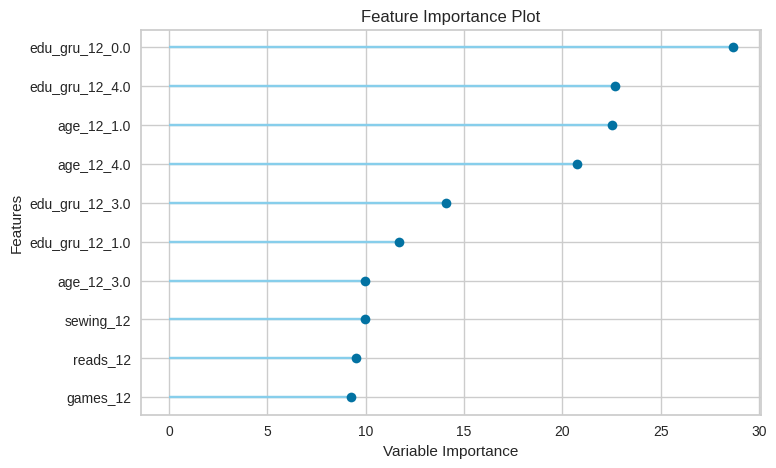

In [27]:
plot_model(bests[0], plot = 'feature')

### Predict 2016 result with 2012 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [28]:
df_dropna_12_16_data=df_dropna_12.merge(label_2016, left_index=True,right_index=True)
data_dropna_12_16 = df_dropna_12_16_data.drop(['year','composite_score'], axis=1)
s=setup(data_dropna_12_16, target = 'composite_score_group',fold=fold,index=True,session_id =1,ordinal_features = 
        {'age_12' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_12':['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_12':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_12':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'memory_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'rrelgimp_12':['1.very important', '2.somewhat important', '3.not important'],
         'rrfcntx_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
         'rsocact_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
                  })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score_group
2,Target type,Regression
3,Original data shape,"(1566, 103)"
4,Transformed data shape,"(1566, 174)"
5,Transformed train set shape,"(1096, 174)"
6,Transformed test set shape,"(470, 174)"
7,Ordinal features,9
8,Numeric features,77
9,Categorical features,25


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34.0277,1807.4428,42.4751,0.5873,0.5291,0.8860,0.0780
llar,Lasso Least Angle Regression,34.3595,1856.2172,43.0103,0.5775,0.5523,0.9765,0.0490
lasso,Lasso Regression,34.3684,1857.3064,43.0209,0.5774,0.5526,0.9782,0.0560
br,Bayesian Ridge,34.8007,1872.3482,43.2368,0.5735,0.5407,0.8924,0.0460
rf,Random Forest Regressor,34.9607,1942.1034,43.9912,0.5584,0.5565,0.9892,0.0860
ridge,Ridge Regression,35.6317,1978.8863,44.4518,0.5476,0.5597,0.8800,0.0520
ada,AdaBoost Regressor,36.2901,2048.2974,45.2002,0.5325,0.5637,0.9872,0.0740
omp,Orthogonal Matching Pursuit,37.0281,2184.0887,46.6523,0.5015,0.5759,1.0674,0.0530
en,Elastic Net,40.0854,2483.5535,49.7810,0.4361,0.6192,1.2641,0.0590
et,Extra Trees Regressor,42.3494,2864.8492,53.4087,0.3504,0.6246,0.9685,0.0910


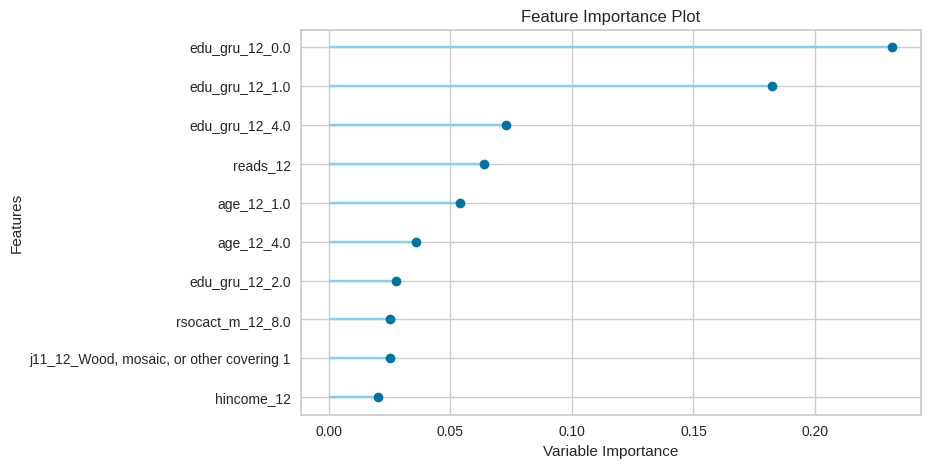

In [29]:
plot_model(bests[0], plot = 'feature')

In [30]:
df_dropna_12_16_data.head()

,age_12,urban_12,married_12,n_mar_12,edu_gru_12,n_living_child_12,migration_12,glob_hlth_12,adl_dress_12,adl_walk_12,...,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score,composite_score_group
uid,,,,,,,,,,,,,,,,,,,,,
aape,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161,162
acmh,4. 80+,"0. <100,000",1. Married or in civil union,2.0,0. No education,2. 3 or 4,0.0,3. Good,0.0,1.0,...,0.No,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,13,2
addk,4. 80+,"1. 100,000+",1. Married or in civil union,1.0,2. 6 years,3. 5 or 6,0.0,4. Fair,1.0,0.0,...,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,38,22
adtd,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,2. 3 or 4,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,272,262
aehw,4. 80+,"0. <100,000",1. Married or in civil union,1.0,0. No education,4. 7+,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,87,82


In [31]:
group_result_16 =predict_model(bests[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,31.8070,1640.3378,40.5011,0.5778,0.4931,0.7090


In [32]:
group_result_16.head()

,age_12,urban_12,married_12,n_mar_12,edu_gru_12,n_living_child_12,migration_12,glob_hlth_12,adl_dress_12,adl_walk_12,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,composite_score_group,prediction_label
uid,,,,,,,,,,,,,,,,,,,,,
bhpi,1. 50–59,"1. 100,000+",1. Married or in civil union,3.0,2. 6 years,3. 5 or 6,0.0,2. Very good,0.0,0.0,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",182,163.860919
rahz,4. 80+,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",22,83.312035
ymsi,2. 60–69,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,2. 3 or 4,0.0,4. Fair,1.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",162,180.779649
plge,3. 70–79,"1. 100,000+",4. Single,0.0,4. 10+ years,0. No children,0.0,4. Fair,0.0,0.0,...,3.2 or 3 times a week,1.Yes,NaN,NaN,NaN,NaN,Yes 1,"Wood, mosaic, or other covering 1",242,267.189460
fpta,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,0. No children,0.0,3. Good,0.0,0.0,...,1.Almost every day,1.Yes,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",182,164.855226


In [33]:
df_dropna_12_16_data.head()

,age_12,urban_12,married_12,n_mar_12,edu_gru_12,n_living_child_12,migration_12,glob_hlth_12,adl_dress_12,adl_walk_12,...,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score,composite_score_group
uid,,,,,,,,,,,,,,,,,,,,,
aape,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161,162
acmh,4. 80+,"0. <100,000",1. Married or in civil union,2.0,0. No education,2. 3 or 4,0.0,3. Good,0.0,1.0,...,0.No,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,13,2
addk,4. 80+,"1. 100,000+",1. Married or in civil union,1.0,2. 6 years,3. 5 or 6,0.0,4. Fair,1.0,0.0,...,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,38,22
adtd,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,2. 3 or 4,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,272,262
aehw,4. 80+,"0. <100,000",1. Married or in civil union,1.0,0. No education,4. 7+,0.0,4. Fair,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,87,82


In [34]:
group_result_16 = group_result_16.merge(df_dropna_12_16_data, how='left', left_index=True, right_index=True)

In [35]:
group_result_16.head()

,age_12_x,urban_12_x,married_12_x,n_mar_12_x,edu_gru_12_x,n_living_child_12_x,migration_12_x,glob_hlth_12_x,adl_dress_12_x,adl_walk_12_x,...,rrelgwk_12_y,a16a_12_y,a21_12_y,a22_12_y,a33b_12_y,a34_12_y,j11_12_y,year,composite_score,composite_score_group_y
uid,,,,,,,,,,,,,,,,,,,,,
bhpi,1. 50–59,"1. 100,000+",1. Married or in civil union,3.0,2. 6 years,3. 5 or 6,0.0,2. Very good,0.0,0.0,...,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,194,182
rahz,4. 80+,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,32,22
ymsi,2. 60–69,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,2. 3 or 4,0.0,4. Fair,1.0,0.0,...,1.Yes,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,165,162
plge,3. 70–79,"1. 100,000+",4. Single,0.0,4. 10+ years,0. No children,0.0,4. Fair,0.0,0.0,...,1.Yes,NaN,NaN,NaN,NaN,Yes 1,"Wood, mosaic, or other covering 1",2016,246,242
fpta,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,0. No children,0.0,3. Good,0.0,0.0,...,1.Yes,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,182,182


In [36]:
print("RMSE:", root_mean_squared_error(group_result_16.prediction_label, group_result_16.composite_score))

RMSE: 41.53768999669053


### Predict 2016 result with 2003,2012 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [37]:
df_dropna_03

,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,adl_walk_03,...,rearnings_03,searnings_03,hincome_03,hinc_business_03,hinc_rent_03,hinc_assets_03,hinc_cap_03,rinc_pension_03,sinc_pension_03,rrelgimp_03
uid,,,,,,,,,,,,,,,,,,,,,
aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.very important
abme,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,0.0,0.0,70000.0,70000.0,0.0,0.0,70000.0,0.0,0.0,1.very important
abrn,1. 50–59,"0. <100,000",1. Married or in civil union,2.0,0. No education,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.very important
acet,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,0. No children,0.0,4. Fair,0.0,0.0,...,30000.0,0.0,70000.0,0.0,0.0,0.0,0.0,0.0,38000.0,2.somewhat important
acmh,3. 70–79,"0. <100,000",1. Married or in civil union,2.0,0. No education,2. 3 or 4,0.0,5. Poor,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.somewhat important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zyxh,2. 60–69,"0. <100,000",1. Married or in civil union,1.0,2. 6 years,0. No children,0.0,4. Fair,0.0,0.0,...,22000.0,0.0,40000.0,0.0,0.0,0.0,0.0,16000.0,0.0,1.very important
zzag,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,0.0,5. Poor,0.0,0.0,...,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.very important
zzci,1. 50–59,"0. <100,000",3. Widowed,1.0,1. 1–5 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.very important


In [38]:
df_dropna_12

,age_12,urban_12,married_12,n_mar_12,edu_gru_12,n_living_child_12,migration_12,glob_hlth_12,adl_dress_12,adl_walk_12,...,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12
uid,,,,,,,,,,,,,,,,,,,,,
aace,2. 60–69,"0. <100,000",1. Married or in civil union,1.0,0. No education,1. 1 or 2,0.0,4. Fair,0.0,NaN,...,2.somewhat important,9.Never,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
aanz,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,1.very important,9.Never,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
aape,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
aard,2. 60–69,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,1.very important,4.Once a week,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2
ablr,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,2. 6 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,1.very important,3.2 or 3 times a week,3.2 or 3 times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzab,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,1. 1 or 2,0.0,2. Very good,0.0,0.0,...,1.very important,9.Never,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
zzag,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,0.0,4. Fair,0.0,0.0,...,1.very important,9.Never,4.Once a week,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2
zzci,2. 60–69,"0. <100,000",3. Widowed,1.0,1. 1–5 years,1. 1 or 2,0.0,3. Good,0.0,0.0,...,1.very important,9.Never,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2


In [39]:
df_dropna_0312 = df_dropna_03.merge(df_dropna_12, how='left', left_index=True, right_index=True)

In [40]:
df_dropna_0312_16_data = df_dropna_0312.merge(label_2016, left_index=True,right_index=True)
data_dropna_0312_16 = df_dropna_0312_16_data.drop(['year', 'composite_score'], axis=1)
for fea in str_features:
    if fea in data_dropna_0312_16.columns:
        print(fea)
        print(sorted(list(Counter(data_dropna_0312_16[fea].dropna()).keys())))

age_03
['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+']
age_12
['1. 50–59', '2. 60–69', '3. 70–79', '4. 80+']
urban_03
['0. <100,000', '1. 100,000+']
urban_12
['0. <100,000', '1. 100,000+']
married_03
['1. Married or in civil union', '2. Separated or divorced', '3. Widowed', '4. Single']
married_12
['1. Married or in civil union', '2. Separated or divorced', '3. Widowed', '4. Single']
edu_gru_03
['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years']
edu_gru_12
['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years']
n_living_child_03
['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+']
n_living_child_12
['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+']
glob_hlth_03
['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor']
glob_hlth_12
['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor']
bmi_03
['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. M

In [41]:
s=setup(data_dropna_0312_16, target = 'composite_score_group',fold=fold,index=True,session_id =1,ordinal_features = 
        {'age_03' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_03':['0. No education', '1. 1–5 years','2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_03':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_03':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_03':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'rrelgimp_03':['1.very important', '2.somewhat important', '3.not important'],
         'age_12' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_12':['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_12':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_12':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'memory_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'rrelgimp_12':['1.very important', '2.somewhat important', '3.not important'],
         'rrfcntx_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
         'rsocact_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never']
         })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score_group
2,Target type,Regression
3,Original data shape,"(1015, 175)"
4,Transformed data shape,"(1015, 275)"
5,Transformed train set shape,"(710, 275)"
6,Transformed test set shape,"(305, 275)"
7,Ordinal features,15
8,Numeric features,138
9,Categorical features,36


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,34.1380,1927.9810,43.8153,0.5274,0.6384,1.3141,0.0770
rf,Random Forest Regressor,34.7682,1940.7185,44.0054,0.5235,0.6574,1.3611,0.1010
llar,Lasso Least Angle Regression,34.3384,1949.8243,44.0709,0.5216,0.6395,1.3210,0.0650
gbr,Gradient Boosting Regressor,34.8729,1964.9355,44.2099,0.5162,0.6561,1.3540,0.1000
br,Bayesian Ridge,35.3897,2002.8207,44.6546,0.5089,0.6448,1.2895,0.0670
ada,AdaBoost Regressor,36.8785,2192.9277,46.7625,0.4617,0.6614,1.3881,0.0870
omp,Orthogonal Matching Pursuit,37.6625,2316.3162,47.9687,0.4350,0.6697,1.4747,0.0670
en,Elastic Net,38.2747,2380.6233,48.6863,0.4186,0.6888,1.5797,0.0780
ridge,Ridge Regression,39.4690,2503.9503,49.9498,0.3824,0.6847,1.3038,0.0690
et,Extra Trees Regressor,42.4744,2889.5016,53.6918,0.2855,0.7223,1.3583,0.1060


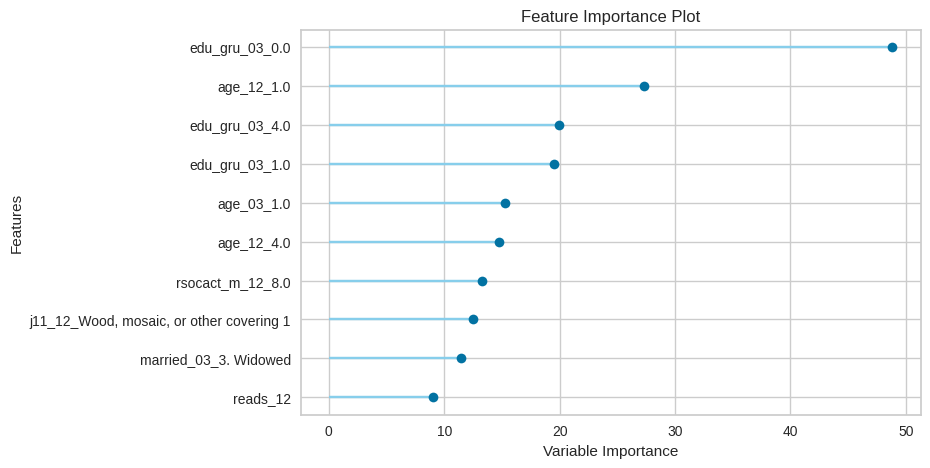

In [42]:
plot_model(bests[0], plot = 'feature')

In [43]:
group_result =predict_model(bests[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,34.3705,1946.3378,44.1173,0.5163,0.5268,0.7620


In [44]:
group_result = group_result.merge(df_dropna_0312_16_data, how='left', left_index=True, right_index=True)

In [45]:
print("RMSE:", root_mean_squared_error(group_result.prediction_label, group_result.composite_score))

RMSE: 43.868159028104806


### Predict 2021 result with 2003,2012 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [46]:
df_dropna_0312_21_data = df_dropna_0312.merge(label_2021, left_index=True,right_index=True)
df_dropna_0312_21= df_dropna_0312_21_data.drop(['year', 'composite_score'], axis=1)
s=setup(df_dropna_0312_21, target = 'composite_score_group',fold=fold,index=True,session_id =1,ordinal_features = 
        {'age_03' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_03':['0. No education', '1. 1–5 years','2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_03':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_03':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_03':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'rrelgimp_03':['1.very important', '2.somewhat important', '3.not important'],
         'age_12' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_12':['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_12':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_12':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'memory_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'rrelgimp_12':['1.very important', '2.somewhat important', '3.not important'],
         'rrfcntx_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
         'rsocact_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never']
         })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score_group
2,Target type,Regression
3,Original data shape,"(1872, 175)"
4,Transformed data shape,"(1872, 274)"
5,Transformed train set shape,"(1310, 274)"
6,Transformed test set shape,"(562, 274)"
7,Ordinal features,15
8,Numeric features,138
9,Categorical features,36


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,32.8253,1764.1334,41.9200,0.4579,0.4782,0.6324,0.1300
lasso,Lasso Regression,33.5517,1840.3759,42.7998,0.4353,0.4849,0.6583,0.0970
llar,Lasso Least Angle Regression,33.6151,1846.3600,42.8622,0.4337,0.4859,0.6598,0.0750
br,Bayesian Ridge,33.6795,1856.5970,42.9806,0.4308,0.4823,0.6333,0.0830
rf,Random Forest Regressor,33.6067,1853.4702,42.9888,0.4273,0.4874,0.6620,0.1420
ada,AdaBoost Regressor,35.1967,2008.6578,44.7460,0.3812,0.4963,0.6838,0.1200
omp,Orthogonal Matching Pursuit,35.1157,2046.7723,45.1090,0.3706,0.5063,0.6936,0.0710
ridge,Ridge Regression,35.4887,2062.2876,45.3087,0.3673,0.5015,0.5969,0.0690
en,Elastic Net,35.7881,2089.3936,45.6250,0.3581,0.5083,0.7307,0.1040
et,Extra Trees Regressor,40.1308,2601.8995,50.9722,0.1950,0.5575,0.7028,0.1520


In [47]:
group_result =predict_model(bests[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,32.0044,1690.8127,41.1195,0.4145,0.4137,0.4216


In [48]:
group_result.head()

,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,adl_walk_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,composite_score_group,prediction_label
uid,,,,,,,,,,,,,,,,,,,,,
rdug,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,3. 5 or 6,0.0,4. Fair,0.0,0.0,...,1.Almost every day,0.No,NaN,1.0,Did not work 08,Neither 3,No 2,Concrete 2,202,139.885877
rnkm,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,0. No education,4. 7+,0.0,5. Poor,0.0,0.0,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,No 2,Concrete 2,142,114.379012
yqtn,3. 70–79,"0. <100,000",3. Widowed,1.0,0. No education,3. 5 or 6,0.0,3. Good,0.0,0.0,...,9.Never,0.No,NaN,NaN,NaN,NaN,No 2,Mud 3,22,80.179037
jfte,0. 49 or younger,"1. 100,000+",1. Married or in civil union,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,"8.Almost Never, sporadic",0.No,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1",302,175.257107
vijo,3. 70–79,"1. 100,000+",3. Widowed,1.0,0. No education,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,9.Never,0.No,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1",42,58.482684


In [49]:
group_result = group_result.merge(df_dropna_0312_21_data, how='left', left_index=True, right_index=True)

In [50]:
print("RMSE:", root_mean_squared_error(group_result.prediction_label, group_result.composite_score))

RMSE: 42.96088961367618


#### Preprocess categorical feature with One-Hot Encoding and fill NA with mode

In [69]:
# Filling missing values with the most frequent value in each column
df_fillna_03 = df_dropna_03.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" or x.dtype == "float" or x.dtype == "int" else x)
df_fillna_12 = df_dropna_12.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" or x.dtype == "float" or x.dtype == "int" else x)
df_encoded_03 = pd.get_dummies(df_fillna_03, drop_first=True, dtype=float)  # Use drop_first=True to avoid multicollinearity if needed
df_encoded_12 = pd.get_dummies(df_fillna_12, drop_first=True, dtype=float)  # Use drop_first=True to avoid multicollinearity if needed
data_03= pd.concat([df_fillna_03,df_encoded_03], axis=1).drop(list(set(str_features)&set(features_03)),axis=1)
data_12= pd.concat([df_fillna_12,df_encoded_12], axis=1).drop(list(set(str_features)&set(features_12)),axis=1)
data_03 = data_03.loc[:, ~data_03.T.duplicated()]
data_12 = data_12.loc[:, ~data_12.T.duplicated()]
data_03_16 = data_03.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
data_03_21 = data_03.merge(label_2021, left_index=True,right_index=True).drop(['year'], axis=1)
data_12_16 = data_12.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
data_12_21 = data_12.merge(label_2021, left_index=True,right_index=True).drop(['year'], axis=1)

In [70]:
#the chi2 function in sklearn.feature_selection requires all values in X to be non-negative
# Replace negative values in X with 0 or another non-negative value if appropriate
def Chi(data_03_16):
    y = data_03_16['composite_score']
    X =data_03_16.drop(['composite_score'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X = X.clip(lower=0)
    z= feature_selection.chi2(X, y)
    fs = []
    for idx, x in enumerate(X.columns):
        fs.append({'name':x,'chi2':z[0][idx], 'p-val':z[1][idx]})
    fs.sort(key=lambda x:-x['chi2'])
    print(fs[:5])
    chi_features=[]
    for x in fs:
        if x['p-val']<0.05:
            chi_features.append(x['name']) 
    data_03_16_selected =  data_03_16[list(pycaret_features)+['composite_score']]
    s=setup(data_03_16_selected, target = 'composite_score',fold=5, index=False,session_id =1,preprocess=False,feature_selection=True )
    bests = compare_models(exclude=['lightgbm'],n_select=20)
    return bests

##### Predict 2016 result with 2003 survey

In [55]:
s=setup(data_03_16, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1015, 94)"
4,Transformed data shape,"(1015, 94)"
5,Transformed train set shape,"(710, 94)"
6,Transformed test set shape,"(305, 94)"
7,Numeric features,93


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,5.0817,35.5919,5.9561,0.9912,0.0776,0.0497,0.0160
en,Elastic Net,5.0810,35.5967,5.9563,0.9912,0.0776,0.0497,0.0160
omp,Orthogonal Matching Pursuit,5.0792,35.4580,5.9462,0.9912,0.0777,0.0497,0.0100
br,Bayesian Ridge,5.0842,35.6665,5.9630,0.9912,0.0776,0.0498,0.0120
llar,Lasso Least Angle Regression,5.0911,35.7614,5.9702,0.9911,0.0777,0.0498,0.0120
ridge,Ridge Regression,5.3159,40.2123,6.3347,0.9901,0.0886,0.0527,0.0120
lr,Linear Regression,5.3833,41.3299,6.4218,0.9898,0.0911,0.0537,0.0120
rf,Random Forest Regressor,5.1913,41.2920,6.3436,0.9898,0.0714,0.0480,0.0700
gbr,Gradient Boosting Regressor,5.2215,42.3348,6.4249,0.9896,0.0747,0.0503,0.0400
et,Extra Trees Regressor,5.7492,53.5573,7.2523,0.9868,0.0897,0.0553,0.0460


In [56]:
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue

Lasso(random_state=1)


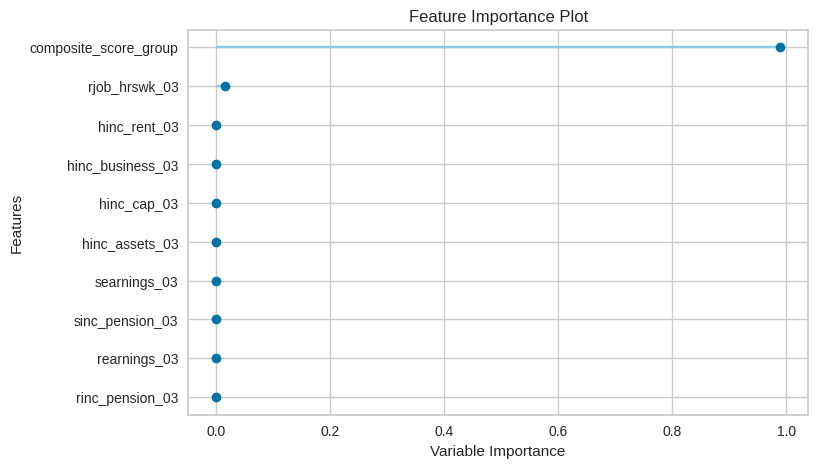

ElasticNet(random_state=1)


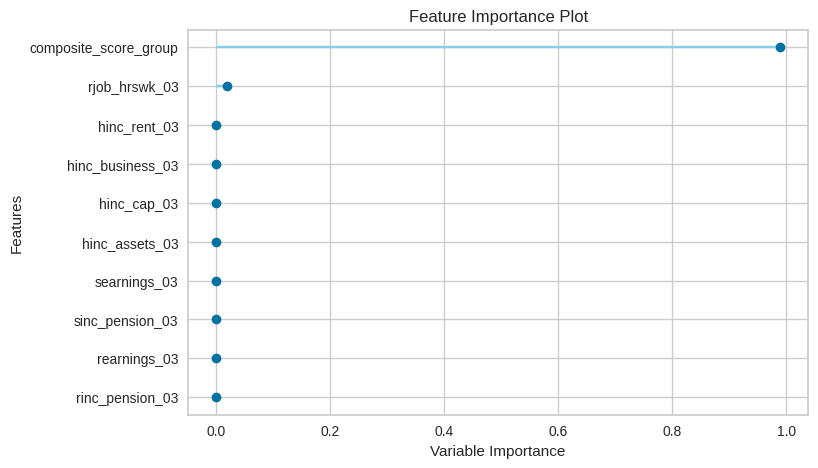

OrthogonalMatchingPursuit()


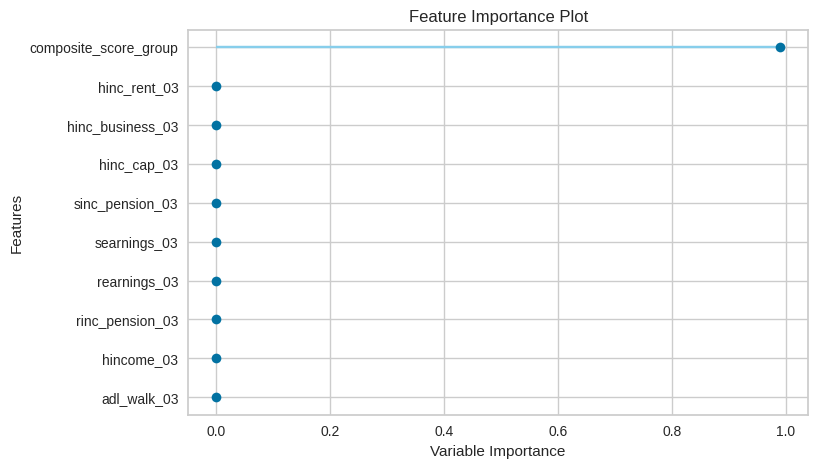

BayesianRidge()


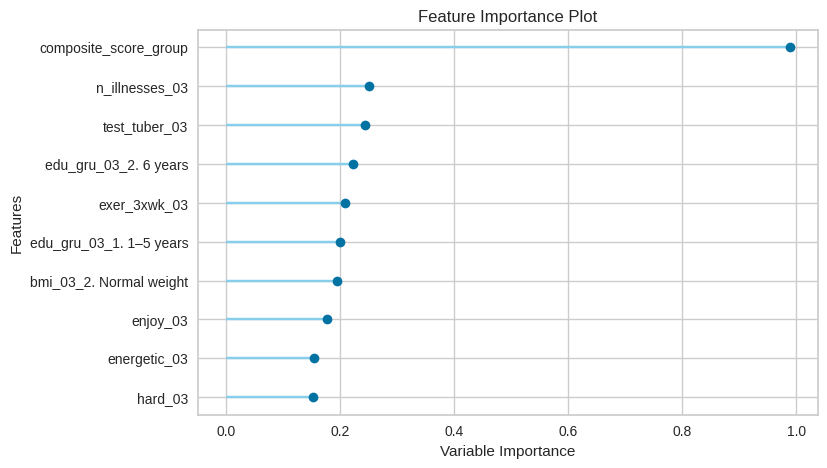

LassoLars(random_state=1)


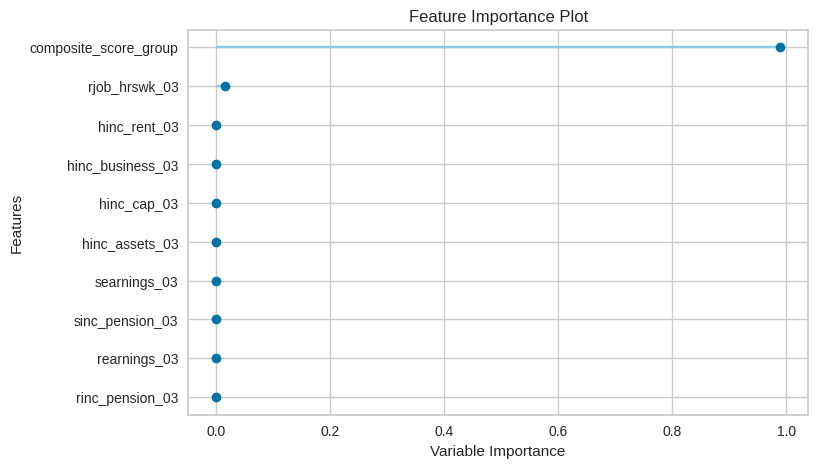

set()


In [57]:
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [71]:
Chi(data_03_16)

[{'name': 'hincome_03', 'chi2': 99054931.1645096, 'p-val': 0.0}, {'name': 'hinc_business_03', 'chi2': 98545828.83155286, 'p-val': 0.0}, {'name': 'hinc_cap_03', 'chi2': 92212804.25676449, 'p-val': 0.0}, {'name': 'rinc_pension_03', 'chi2': 53972593.950640716, 'p-val': 0.0}, {'name': 'searnings_03', 'chi2': 49470423.8084646, 'p-val': 0.0}]


,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1015, 1)"
4,Transformed data shape,"(1015, 1)"
5,Transformed train set shape,"(710, 1)"
6,Transformed test set shape,"(305, 1)"


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,51.6945,4099.2939,64.0028,-0.0060,0.6136,0.7380,0.0100


DummyRegressor()

##### Predict 2021 result with 2003 survey

In [ ]:
s=setup(data_03_21, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [ ]:
Chi(data_03_21)

##### Predict 2016 result with 2012 survey

In [ ]:
s=setup(data_12_16, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [ ]:
Chi(data_12_16)

##### Predict 2021 result with 2012 survey

In [ ]:
s=setup(data_12_21, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [ ]:
Chi(data_12_21)